# Create a Convolutional Neural Network using Python and libraries

The goal of this project is to create a CNN and learn it to recognize faces in photos.
We will use open-sources pictures libraries to train our model.
We will implement the following steps:
1. Import all needed libraries
2. Import images dataset, normalize it and shape it to fit the NN
3. Initialize the NN 
4. Train the NN with train dataset and check with validation dataset
5. Test the NN on test dataset

## Initialization

### 1.Import all needed libraries

We begin by initializing our programing environnement, importing every library needed.


In [3]:
!pip install torchvision

In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import seaborn as sb
import random
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

In [4]:
!pip install -U skorch

Requirement already up-to-date: skorch in c:\users\maxime dardy\.conda\envs\ml\lib\site-packages (0.6.0)


In [5]:
from skorch import NeuralNetBinaryClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### 2. Import images dataset and shape it

Importing the dataset and normalizing it to fit into the NN

In [6]:
transform = transforms.Compose(
    [transforms.Resize((36,36)),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
        # transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
    ])

trainsetTotal = torchvision.datasets.ImageFolder(root='./start_deep/train_images',transform=transform)

trainloader = torch.utils.data.DataLoader(trainsetTotal, batch_size=64,
                                          shuffle=True)



testset = torchvision.datasets.ImageFolder(root='./start_deep/test_images_custom',transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)
classes=('non-visage','visage')

print images

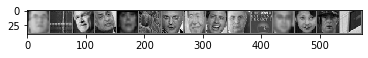

visage non-visage visage visage visage non-visage visage visage visage visage non-visage visage visage visage non-visage


In [7]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
data = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(data[0][0:15], nrow = 16))
# print labels
print(' '.join('%5s' % classes[data[1][j]] for j in range(15)))

### 2. Initialize the NN

we create our network and instanciate it using the torch.nn library

In [8]:
class CNN(nn.Module):
    
    #define the architecture of the NN
    def __init__(self):
        super(CNN,self).__init__()
        # 1 input chanel as images are in gray nuance
        # 6 output channels
        # 5x5 square convolution
        self.conv1 = nn.Conv2d(1,6,5)
        self.pool1 = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,20,5)
        self.conv3 = nn.Conv2d(20,30,5)
        #self.pool2 = nn.MaxPool2d(2,2)
        #ad affine operation y = Wx + b
        #correspond to the differents layers of the NN
        # with W = weight of the neurones and B = bias
        #self.fc1 = nn.Linear(20*5*5,200)
        self.fc1 = nn.Linear(30*8*8,200)
        self.fc2 = nn.Linear(200,80)
        self.fc3 = nn.Linear(80,2)
    
    #define the feed-forward algorithm for the NN
    
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        #x = self.pool2(F.relu(self.conv2(x)))
        x = (F.relu(self.conv2(x)))
        x = (F.relu(self.conv3(x)))
        #x = x.view(-1, 20*5*5)
        x = x.view(-1, 30*8*8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
cnn = CNN()

We create the torch wrapper in order to use the skitlearn functions

In [9]:
net = NeuralNetBinaryClassifier(
    module = CNN,
    #criterion= nn.CrossEntropyLoss,
    lr = 0.001,
    optimizer = optim.SGD,
    threshold=0.5,
    max_epochs = 4,
    batch_size =128,
    warm_start=True 
)

We now create:
* the criterion which will calculate the Loss function
    in this case we use CrossEntropyLoss: a combination of Softmax and Loss fct
* the optimizer which the algorithm used to compute the weight (grad desc, Adam...)
    in this case we use Stochastical Gradient Descent

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)

### 4. Train and validate the NN

Train and validate the NN using skitlearn with cross validation

In [ ]:
#trainingFeatures = trainingFeatures.view(-1,1)
net.fit(trainingFeatures,trainingLabels)

In [16]:
for epoch in range(6): # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
       # imshow(torchvision.utils.make_grid(inputs[0:10]))
       # print(' '.join('%5s' % classes[labels[j]] for j in range(10)))
        
        #zero the parameter gradients
        optimizer.zero_grad()
        
        #forward + backward prop + optimizer
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #print statistics
        running_loss += loss.item()
        if i %100 == 99: #print every 100 mini-batches
            print('[%d, %5d loss: %.3f]' %
                 (epoch +1, i +1, running_loss / 100))
            running_loss = 0.0
            
print('Finished Training')

[1,   100 loss: 0.662]
[1,   200 loss: 0.626]
[1,   300 loss: 0.610]
[1,   400 loss: 0.606]
[1,   500 loss: 0.592]
[1,   600 loss: 0.591]
[1,   700 loss: 0.567]
[1,   800 loss: 0.501]
[1,   900 loss: 0.414]
[1,  1000 loss: 0.371]
[1,  1100 loss: 0.311]
[1,  1200 loss: 0.241]
[1,  1300 loss: 0.206]
[1,  1400 loss: 0.173]
[2,   100 loss: 0.154]
[2,   200 loss: 0.151]
[2,   300 loss: 0.143]
[2,   400 loss: 0.136]
[2,   500 loss: 0.124]
[2,   600 loss: 0.112]
[2,   700 loss: 0.099]
[2,   800 loss: 0.111]
[2,   900 loss: 0.107]
[2,  1000 loss: 0.107]
[2,  1100 loss: 0.094]
[2,  1200 loss: 0.100]
[2,  1300 loss: 0.089]
[2,  1400 loss: 0.087]
[3,   100 loss: 0.088]
[3,   200 loss: 0.082]
[3,   300 loss: 0.080]
[3,   400 loss: 0.082]
[3,   500 loss: 0.075]
[3,   600 loss: 0.078]
[3,   700 loss: 0.080]
[3,   800 loss: 0.077]
[3,   900 loss: 0.074]
[3,  1000 loss: 0.069]
[3,  1100 loss: 0.075]
[3,  1200 loss: 0.067]
[3,  1300 loss: 0.066]
[3,  1400 loss: 0.065]
[4,   100 loss: 0.067]
[4,   200 l

We save our trained model

In [18]:
PATH = './CNN_2.pth'
torch.save(cnn.state_dict(), PATH)

In [19]:
cnn = CNN()
PATH = './CNN_2.pth'
cnn.load_state_dict(torch.load(PATH))

### 5. Test the NN on test dataset

In [20]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        imagesTest, labelsTest = data
        outputsTest = cnn(imagesTest)
        _,predicted = torch.max(outputsTest.data, 1)
        total += labelsTest.size(0)
        correct += (predicted == labelsTest).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 90 %


### 6. Detect the faces in general images

In [21]:
!pip install imutils

In [26]:
import imutils
import argparse
import cv2
import time
from PIL import Image

transformer = transforms.Compose([transforms.Resize(36),
                                      transforms.ToTensor(),
                                     ])

def pyramid(image, scale=1.2, minSize=(36,36)):
    yield image

    while True:
        #compute the new dimensions and resize
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width = w)

        #if image is small enough stop
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break

        yield image


def sliding_window(image, stepSize, windowSize):
    #sliding a window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range (0, image.shape[1], stepSize):
            #yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])


image = cv2.imread("image.jpg")
(winW, winH) = (36, 36)

#loop over the pyramid
for (i, resized) in enumerate(pyramid(image)):
    # loop over the sliding window for each layer of the pyramid
	for (x, y, window) in sliding_window(resized, stepSize=15, windowSize=(winW, winH)):
		# if the window does not meet our desired window size, ignore it
		if window.shape[0] != winH or window.shape[1] != winW:
			continue

		ROI = resized[y:y+winH, x:x+winW]
		ROI_grey = cv2.cvtColor(ROI, cv2.COLOR_BGR2GRAY)
		PIL_ROI = Image.fromarray(ROI_grey)
		ROI_tensor = transformer(PIL_ROI).float()
		ROI_tensor = ROI_tensor.unsqueeze_(0)
		isFace = cnn(ROI_tensor)
		print(isFace)
        
# 		if isFace:
# 			cv2.rectangle(image, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
# 			cv2.imshow("Window", image)
# 			cv2.waitKey(1)
 
# 		since we do not have a classifier, we'll just draw the window
# 		clone = resized.copy()
# 		cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
# 		cv2.imshow("Window", clone)
# 		cv2.waitKey(1)

cv2.destroyAllWindows()

tensor([[ 2.5653, -2.4274]], grad_fn=<AddmmBackward>)
tensor([[ 1.9548, -1.7846]], grad_fn=<AddmmBackward>)
tensor([[ 2.2652, -2.1346]], grad_fn=<AddmmBackward>)
tensor([[ 2.5258, -2.3931]], grad_fn=<AddmmBackward>)
tensor([[ 2.3777, -2.2328]], grad_fn=<AddmmBackward>)
tensor([[ 2.6085, -2.4620]], grad_fn=<AddmmBackward>)
tensor([[ 1.9116, -1.7792]], grad_fn=<AddmmBackward>)
tensor([[ 3.0172, -2.8856]], grad_fn=<AddmmBackward>)
tensor([[ 3.1764, -3.0410]], grad_fn=<AddmmBackward>)
tensor([[ 2.9544, -2.8180]], grad_fn=<AddmmBackward>)
tensor([[ 3.5321, -3.3989]], grad_fn=<AddmmBackward>)
tensor([[ 3.4213, -3.2929]], grad_fn=<AddmmBackward>)
tensor([[ 3.5311, -3.3900]], grad_fn=<AddmmBackward>)
tensor([[ 3.3621, -3.2379]], grad_fn=<AddmmBackward>)
tensor([[ 3.1903, -3.0287]], grad_fn=<AddmmBackward>)
tensor([[ 4.2816, -4.1293]], grad_fn=<AddmmBackward>)
tensor([[ 4.7419, -4.6202]], grad_fn=<AddmmBackward>)
tensor([[ 4.5977, -4.4667]], grad_fn=<AddmmBackward>)
tensor([[ 4.2944, -4.1800]],

tensor([[ 3.8894, -3.7769]], grad_fn=<AddmmBackward>)
tensor([[ 3.0582, -2.9277]], grad_fn=<AddmmBackward>)
tensor([[ 3.7509, -3.6089]], grad_fn=<AddmmBackward>)
tensor([[ 3.6744, -3.5037]], grad_fn=<AddmmBackward>)
tensor([[ 3.9443, -3.8069]], grad_fn=<AddmmBackward>)
tensor([[ 3.6656, -3.5492]], grad_fn=<AddmmBackward>)
tensor([[ 4.2674, -4.1601]], grad_fn=<AddmmBackward>)
tensor([[ 4.1617, -4.0455]], grad_fn=<AddmmBackward>)
tensor([[ 4.1617, -4.0456]], grad_fn=<AddmmBackward>)
tensor([[ 4.1511, -4.0356]], grad_fn=<AddmmBackward>)
tensor([[ 4.1423, -4.0257]], grad_fn=<AddmmBackward>)
tensor([[ 4.0709, -3.9541]], grad_fn=<AddmmBackward>)
tensor([[ 4.0329, -3.9164]], grad_fn=<AddmmBackward>)
tensor([[ 4.0436, -3.9273]], grad_fn=<AddmmBackward>)
tensor([[ 4.0197, -3.9027]], grad_fn=<AddmmBackward>)
tensor([[ 4.0096, -3.8932]], grad_fn=<AddmmBackward>)
tensor([[ 4.0007, -3.8846]], grad_fn=<AddmmBackward>)
tensor([[ 4.0376, -3.9203]], grad_fn=<AddmmBackward>)
tensor([[ 4.0821, -3.9658]],

tensor([[ 4.1028, -3.9867]], grad_fn=<AddmmBackward>)
tensor([[ 4.0714, -3.9550]], grad_fn=<AddmmBackward>)
tensor([[ 4.0758, -3.9587]], grad_fn=<AddmmBackward>)
tensor([[ 4.0959, -3.9788]], grad_fn=<AddmmBackward>)
tensor([[ 4.1025, -3.9861]], grad_fn=<AddmmBackward>)
tensor([[ 4.1073, -3.9908]], grad_fn=<AddmmBackward>)
tensor([[ 4.1067, -3.9896]], grad_fn=<AddmmBackward>)
tensor([[ 4.1353, -4.0179]], grad_fn=<AddmmBackward>)
tensor([[ 4.1421, -4.0245]], grad_fn=<AddmmBackward>)
tensor([[ 4.1652, -4.0476]], grad_fn=<AddmmBackward>)
tensor([[ 4.1681, -4.0500]], grad_fn=<AddmmBackward>)
tensor([[ 4.1791, -4.0620]], grad_fn=<AddmmBackward>)
tensor([[ 4.1681, -4.0504]], grad_fn=<AddmmBackward>)
tensor([[ 2.6408, -2.5078]], grad_fn=<AddmmBackward>)
tensor([[ 2.9991, -2.8679]], grad_fn=<AddmmBackward>)
tensor([[ 2.9504, -2.8151]], grad_fn=<AddmmBackward>)
tensor([[ 2.8724, -2.7389]], grad_fn=<AddmmBackward>)
tensor([[ 2.8252, -2.6971]], grad_fn=<AddmmBackward>)
tensor([[ 3.1111, -2.9661]],

tensor([[ 2.8875, -2.7575]], grad_fn=<AddmmBackward>)
tensor([[ 3.0147, -2.8824]], grad_fn=<AddmmBackward>)
tensor([[ 2.9921, -2.8598]], grad_fn=<AddmmBackward>)
tensor([[ 3.0179, -2.8765]], grad_fn=<AddmmBackward>)
tensor([[ 2.9411, -2.8095]], grad_fn=<AddmmBackward>)
tensor([[ 2.2470, -2.1202]], grad_fn=<AddmmBackward>)
tensor([[ 1.6392, -1.4846]], grad_fn=<AddmmBackward>)
tensor([[ 3.2481, -3.1241]], grad_fn=<AddmmBackward>)
tensor([[ 3.2179, -3.0826]], grad_fn=<AddmmBackward>)
tensor([[ 3.2495, -3.1208]], grad_fn=<AddmmBackward>)
tensor([[ 3.0932, -2.9612]], grad_fn=<AddmmBackward>)
tensor([[ 3.1304, -2.9960]], grad_fn=<AddmmBackward>)
tensor([[ 3.4204, -3.2830]], grad_fn=<AddmmBackward>)
tensor([[ 3.3871, -3.2463]], grad_fn=<AddmmBackward>)
tensor([[ 3.7789, -3.6416]], grad_fn=<AddmmBackward>)
tensor([[ 3.2069, -3.0993]], grad_fn=<AddmmBackward>)
tensor([[ 2.7612, -2.6760]], grad_fn=<AddmmBackward>)
tensor([[ 3.6595, -3.5519]], grad_fn=<AddmmBackward>)
tensor([[ 3.7897, -3.6803]],

tensor([[ 4.0665, -3.9442]], grad_fn=<AddmmBackward>)
tensor([[ 4.0586, -3.9423]], grad_fn=<AddmmBackward>)
tensor([[ 4.0738, -3.9572]], grad_fn=<AddmmBackward>)
tensor([[ 3.2044, -3.0560]], grad_fn=<AddmmBackward>)
tensor([[ 2.9298, -2.7714]], grad_fn=<AddmmBackward>)
tensor([[ 4.1546, -4.0517]], grad_fn=<AddmmBackward>)
tensor([[ 4.0187, -3.9045]], grad_fn=<AddmmBackward>)
tensor([[ 3.8861, -3.7707]], grad_fn=<AddmmBackward>)
tensor([[ 4.0971, -3.9809]], grad_fn=<AddmmBackward>)
tensor([[ 4.2042, -4.0873]], grad_fn=<AddmmBackward>)
tensor([[ 4.2182, -4.1019]], grad_fn=<AddmmBackward>)
tensor([[ 4.0913, -3.9759]], grad_fn=<AddmmBackward>)
tensor([[ 4.0329, -3.9193]], grad_fn=<AddmmBackward>)
tensor([[ 4.1758, -4.0592]], grad_fn=<AddmmBackward>)
tensor([[ 4.1679, -4.0508]], grad_fn=<AddmmBackward>)
tensor([[ 4.1925, -4.0756]], grad_fn=<AddmmBackward>)
tensor([[ 4.1993, -4.0826]], grad_fn=<AddmmBackward>)
tensor([[ 4.1942, -4.0773]], grad_fn=<AddmmBackward>)
tensor([[ 4.1931, -4.0763]],

tensor([[ 4.1828, -4.0648]], grad_fn=<AddmmBackward>)
tensor([[ 4.2031, -4.0862]], grad_fn=<AddmmBackward>)
tensor([[ 4.1795, -4.0629]], grad_fn=<AddmmBackward>)
tensor([[ 4.1585, -4.0429]], grad_fn=<AddmmBackward>)
tensor([[ 4.1758, -4.0591]], grad_fn=<AddmmBackward>)
tensor([[ 4.1804, -4.0633]], grad_fn=<AddmmBackward>)
tensor([[ 4.1925, -4.0754]], grad_fn=<AddmmBackward>)
tensor([[ 4.1995, -4.0830]], grad_fn=<AddmmBackward>)
tensor([[ 4.2027, -4.0860]], grad_fn=<AddmmBackward>)
tensor([[ 4.1972, -4.0807]], grad_fn=<AddmmBackward>)
tensor([[ 1.2014, -1.0476]], grad_fn=<AddmmBackward>)
tensor([[ 2.1065, -1.9959]], grad_fn=<AddmmBackward>)
tensor([[ 2.9026, -2.7694]], grad_fn=<AddmmBackward>)
tensor([[ 2.8032, -2.6732]], grad_fn=<AddmmBackward>)
tensor([[ 2.9408, -2.8125]], grad_fn=<AddmmBackward>)
tensor([[ 3.1971, -3.0603]], grad_fn=<AddmmBackward>)
tensor([[ 3.1538, -3.0331]], grad_fn=<AddmmBackward>)
tensor([[ 3.1540, -3.0174]], grad_fn=<AddmmBackward>)
tensor([[ 3.2383, -3.1052]],

tensor([[ 3.1614, -3.0293]], grad_fn=<AddmmBackward>)
tensor([[ 3.0325, -2.9098]], grad_fn=<AddmmBackward>)
tensor([[ 2.8347, -2.7159]], grad_fn=<AddmmBackward>)
tensor([[ 3.1552, -3.0259]], grad_fn=<AddmmBackward>)
tensor([[ 3.1152, -2.9772]], grad_fn=<AddmmBackward>)
tensor([[ 3.2029, -3.0666]], grad_fn=<AddmmBackward>)
tensor([[ 3.0681, -2.9404]], grad_fn=<AddmmBackward>)
tensor([[ 3.1198, -2.9875]], grad_fn=<AddmmBackward>)
tensor([[ 3.4205, -3.2920]], grad_fn=<AddmmBackward>)
tensor([[ 3.7380, -3.5961]], grad_fn=<AddmmBackward>)
tensor([[ 3.4677, -3.3258]], grad_fn=<AddmmBackward>)
tensor([[ 3.5578, -3.4319]], grad_fn=<AddmmBackward>)
tensor([[ 3.9907, -3.8816]], grad_fn=<AddmmBackward>)
tensor([[ 3.9243, -3.7887]], grad_fn=<AddmmBackward>)
tensor([[ 3.5104, -3.3329]], grad_fn=<AddmmBackward>)
tensor([[ 3.1701, -2.9853]], grad_fn=<AddmmBackward>)
tensor([[ 3.3910, -3.3012]], grad_fn=<AddmmBackward>)
tensor([[ 4.2599, -4.1041]], grad_fn=<AddmmBackward>)
tensor([[ 4.1505, -3.9569]],

tensor([[ 1.7399, -1.6722]], grad_fn=<AddmmBackward>)
tensor([[ 3.5033, -3.4136]], grad_fn=<AddmmBackward>)
tensor([[ 4.0520, -3.9309]], grad_fn=<AddmmBackward>)
tensor([[ 4.1333, -4.0121]], grad_fn=<AddmmBackward>)
tensor([[ 3.8020, -3.6862]], grad_fn=<AddmmBackward>)
tensor([[ 3.8050, -3.6879]], grad_fn=<AddmmBackward>)
tensor([[ 3.4256, -3.3140]], grad_fn=<AddmmBackward>)
tensor([[ 2.5289, -2.4226]], grad_fn=<AddmmBackward>)
tensor([[ 2.9675, -2.8672]], grad_fn=<AddmmBackward>)
tensor([[ 3.3821, -3.2757]], grad_fn=<AddmmBackward>)
tensor([[ 2.1240, -2.0192]], grad_fn=<AddmmBackward>)
tensor([[ 2.1581, -2.0560]], grad_fn=<AddmmBackward>)
tensor([[ 3.1937, -3.1052]], grad_fn=<AddmmBackward>)
tensor([[ 3.4565, -3.3265]], grad_fn=<AddmmBackward>)
tensor([[ 3.8356, -3.6767]], grad_fn=<AddmmBackward>)
tensor([[ 4.0527, -3.9041]], grad_fn=<AddmmBackward>)
tensor([[ 4.5534, -4.4237]], grad_fn=<AddmmBackward>)
tensor([[ 4.0747, -3.9407]], grad_fn=<AddmmBackward>)
tensor([[ 4.6362, -4.5251]],

tensor([[ 3.3999, -3.2678]], grad_fn=<AddmmBackward>)
tensor([[ 3.5707, -3.4494]], grad_fn=<AddmmBackward>)
tensor([[ 3.5270, -3.3783]], grad_fn=<AddmmBackward>)
tensor([[ 3.7597, -3.6481]], grad_fn=<AddmmBackward>)
tensor([[ 3.8884, -3.7664]], grad_fn=<AddmmBackward>)
tensor([[ 3.7777, -3.6557]], grad_fn=<AddmmBackward>)
tensor([[ 3.0779, -2.9076]], grad_fn=<AddmmBackward>)
tensor([[ 2.4246, -2.2819]], grad_fn=<AddmmBackward>)
tensor([[ 3.8630, -3.7488]], grad_fn=<AddmmBackward>)
tensor([[ 4.0999, -3.9881]], grad_fn=<AddmmBackward>)
tensor([[ 4.1594, -4.0434]], grad_fn=<AddmmBackward>)
tensor([[ 4.1723, -4.0557]], grad_fn=<AddmmBackward>)
tensor([[ 4.1179, -4.0014]], grad_fn=<AddmmBackward>)
tensor([[ 4.0718, -3.9552]], grad_fn=<AddmmBackward>)
tensor([[ 4.0479, -3.9314]], grad_fn=<AddmmBackward>)
tensor([[ 4.0324, -3.9154]], grad_fn=<AddmmBackward>)
tensor([[ 4.0012, -3.8848]], grad_fn=<AddmmBackward>)
tensor([[ 3.9415, -3.8254]], grad_fn=<AddmmBackward>)
tensor([[ 3.9385, -3.8225]],

tensor([[ 3.2618, -3.1232]], grad_fn=<AddmmBackward>)
tensor([[ 3.0988, -2.9718]], grad_fn=<AddmmBackward>)
tensor([[ 3.3803, -3.2507]], grad_fn=<AddmmBackward>)
tensor([[ 3.5473, -3.4198]], grad_fn=<AddmmBackward>)
tensor([[ 3.7582, -3.6367]], grad_fn=<AddmmBackward>)
tensor([[ 3.5154, -3.3905]], grad_fn=<AddmmBackward>)
tensor([[ 3.5194, -3.4030]], grad_fn=<AddmmBackward>)
tensor([[ 3.9805, -3.8510]], grad_fn=<AddmmBackward>)
tensor([[ 3.5615, -3.4279]], grad_fn=<AddmmBackward>)
tensor([[ 4.0468, -3.9094]], grad_fn=<AddmmBackward>)
tensor([[ 4.0257, -3.9037]], grad_fn=<AddmmBackward>)
tensor([[ 4.1767, -4.0598]], grad_fn=<AddmmBackward>)
tensor([[ 4.1605, -4.0440]], grad_fn=<AddmmBackward>)
tensor([[ 4.1562, -4.0395]], grad_fn=<AddmmBackward>)
tensor([[ 4.1677, -4.0509]], grad_fn=<AddmmBackward>)
tensor([[ 4.1495, -4.0334]], grad_fn=<AddmmBackward>)
tensor([[ 4.1094, -3.9931]], grad_fn=<AddmmBackward>)
tensor([[ 4.0548, -3.9388]], grad_fn=<AddmmBackward>)
tensor([[ 4.0209, -3.9039]],

tensor([[ 3.2569, -3.0937]], grad_fn=<AddmmBackward>)
tensor([[ 3.8804, -3.7623]], grad_fn=<AddmmBackward>)
tensor([[ 4.0506, -3.9330]], grad_fn=<AddmmBackward>)
tensor([[ 3.8045, -3.6862]], grad_fn=<AddmmBackward>)
tensor([[ 4.1118, -3.9993]], grad_fn=<AddmmBackward>)
tensor([[ 4.0676, -3.9504]], grad_fn=<AddmmBackward>)
tensor([[ 4.1791, -4.0584]], grad_fn=<AddmmBackward>)
tensor([[ 4.1407, -4.0220]], grad_fn=<AddmmBackward>)
tensor([[ 4.1735, -4.0572]], grad_fn=<AddmmBackward>)
tensor([[ 4.2424, -4.1256]], grad_fn=<AddmmBackward>)
tensor([[ 4.2152, -4.0942]], grad_fn=<AddmmBackward>)
tensor([[ 4.1898, -4.0716]], grad_fn=<AddmmBackward>)
tensor([[ 4.1391, -4.0229]], grad_fn=<AddmmBackward>)
tensor([[ 4.1867, -4.0701]], grad_fn=<AddmmBackward>)
tensor([[ 4.1827, -4.0666]], grad_fn=<AddmmBackward>)
tensor([[ 4.1631, -4.0465]], grad_fn=<AddmmBackward>)
tensor([[ 4.1608, -4.0449]], grad_fn=<AddmmBackward>)
tensor([[ 4.1516, -4.0351]], grad_fn=<AddmmBackward>)
tensor([[ 4.1078, -3.9899]],

tensor([[ 3.3957, -3.2703]], grad_fn=<AddmmBackward>)
tensor([[ 2.5523, -2.2452]], grad_fn=<AddmmBackward>)
tensor([[ 2.4101, -2.1786]], grad_fn=<AddmmBackward>)
tensor([[ 3.4046, -3.2794]], grad_fn=<AddmmBackward>)
tensor([[ 4.1081, -3.9912]], grad_fn=<AddmmBackward>)
tensor([[ 4.1484, -4.0321]], grad_fn=<AddmmBackward>)
tensor([[ 4.1865, -4.0698]], grad_fn=<AddmmBackward>)
tensor([[ 4.1826, -4.0660]], grad_fn=<AddmmBackward>)
tensor([[ 4.1692, -4.0537]], grad_fn=<AddmmBackward>)
tensor([[ 4.1833, -4.0662]], grad_fn=<AddmmBackward>)
tensor([[ 4.1367, -4.0197]], grad_fn=<AddmmBackward>)
tensor([[ 4.1767, -4.0601]], grad_fn=<AddmmBackward>)
tensor([[ 4.1912, -4.0746]], grad_fn=<AddmmBackward>)
tensor([[ 4.1845, -4.0683]], grad_fn=<AddmmBackward>)
tensor([[ 4.1502, -4.0329]], grad_fn=<AddmmBackward>)
tensor([[ 4.1369, -4.0198]], grad_fn=<AddmmBackward>)
tensor([[ 4.1769, -4.0598]], grad_fn=<AddmmBackward>)
tensor([[ 4.2019, -4.0850]], grad_fn=<AddmmBackward>)
tensor([[ 4.1963, -4.0798]],

tensor([[ 3.8100, -3.6860]], grad_fn=<AddmmBackward>)
tensor([[ 4.0510, -3.9295]], grad_fn=<AddmmBackward>)
tensor([[ 4.2303, -4.1099]], grad_fn=<AddmmBackward>)
tensor([[ 4.3200, -4.1942]], grad_fn=<AddmmBackward>)
tensor([[ 4.2180, -4.1003]], grad_fn=<AddmmBackward>)
tensor([[ 4.3286, -4.1968]], grad_fn=<AddmmBackward>)
tensor([[ 3.9344, -3.8037]], grad_fn=<AddmmBackward>)
tensor([[ 3.7459, -3.5986]], grad_fn=<AddmmBackward>)
tensor([[ 4.3904, -4.2611]], grad_fn=<AddmmBackward>)
tensor([[ 4.5411, -4.4181]], grad_fn=<AddmmBackward>)
tensor([[ 4.4641, -4.3382]], grad_fn=<AddmmBackward>)
tensor([[ 4.1448, -4.0121]], grad_fn=<AddmmBackward>)
tensor([[ 3.7375, -3.5930]], grad_fn=<AddmmBackward>)
tensor([[ 4.1816, -4.0591]], grad_fn=<AddmmBackward>)
tensor([[ 4.9914, -4.8867]], grad_fn=<AddmmBackward>)
tensor([[ 4.5492, -4.4509]], grad_fn=<AddmmBackward>)
tensor([[ 2.7266, -2.5950]], grad_fn=<AddmmBackward>)
tensor([[ 2.3015, -2.1705]], grad_fn=<AddmmBackward>)
tensor([[ 2.3560, -2.2377]],

tensor([[ 2.7467, -2.6051]], grad_fn=<AddmmBackward>)
tensor([[ 1.8434, -1.6738]], grad_fn=<AddmmBackward>)
tensor([[ 2.9192, -2.7876]], grad_fn=<AddmmBackward>)
tensor([[ 2.7893, -2.6489]], grad_fn=<AddmmBackward>)
tensor([[ 2.5832, -2.4562]], grad_fn=<AddmmBackward>)
tensor([[ 2.7575, -2.6197]], grad_fn=<AddmmBackward>)
tensor([[ 2.0823, -1.9181]], grad_fn=<AddmmBackward>)
tensor([[ 1.6349, -1.4751]], grad_fn=<AddmmBackward>)
tensor([[ 2.3383, -2.2106]], grad_fn=<AddmmBackward>)
tensor([[ 2.6611, -2.5498]], grad_fn=<AddmmBackward>)
tensor([[ 2.5402, -2.4442]], grad_fn=<AddmmBackward>)
tensor([[ 3.7190, -3.5916]], grad_fn=<AddmmBackward>)
tensor([[ 4.5613, -4.4108]], grad_fn=<AddmmBackward>)
tensor([[ 3.8408, -3.6846]], grad_fn=<AddmmBackward>)
tensor([[ 3.7234, -3.6017]], grad_fn=<AddmmBackward>)
tensor([[ 4.0959, -3.9808]], grad_fn=<AddmmBackward>)
tensor([[ 4.1370, -4.0211]], grad_fn=<AddmmBackward>)
tensor([[ 4.1040, -3.9888]], grad_fn=<AddmmBackward>)
tensor([[ 4.0614, -3.9448]],

tensor([[ 2.8869, -2.7491]], grad_fn=<AddmmBackward>)
tensor([[ 2.9255, -2.7919]], grad_fn=<AddmmBackward>)
tensor([[ 2.9911, -2.8495]], grad_fn=<AddmmBackward>)
tensor([[ 3.1166, -2.9950]], grad_fn=<AddmmBackward>)
tensor([[ 2.9700, -2.8426]], grad_fn=<AddmmBackward>)
tensor([[ 2.9263, -2.8108]], grad_fn=<AddmmBackward>)
tensor([[ 2.9356, -2.8051]], grad_fn=<AddmmBackward>)
tensor([[ 2.9828, -2.8453]], grad_fn=<AddmmBackward>)
tensor([[ 3.1142, -2.9761]], grad_fn=<AddmmBackward>)
tensor([[ 3.4865, -3.3598]], grad_fn=<AddmmBackward>)
tensor([[ 3.4416, -3.3181]], grad_fn=<AddmmBackward>)
tensor([[ 3.8028, -3.6805]], grad_fn=<AddmmBackward>)
tensor([[ 3.9945, -3.8720]], grad_fn=<AddmmBackward>)
tensor([[ 4.0405, -3.9199]], grad_fn=<AddmmBackward>)
tensor([[ 4.0232, -3.9084]], grad_fn=<AddmmBackward>)
tensor([[ 3.9789, -3.8648]], grad_fn=<AddmmBackward>)
tensor([[ 4.0026, -3.8870]], grad_fn=<AddmmBackward>)
tensor([[ 4.1237, -4.0059]], grad_fn=<AddmmBackward>)
tensor([[ 4.1364, -4.0215]],

tensor([[ 2.8904, -2.7634]], grad_fn=<AddmmBackward>)
tensor([[ 3.0405, -2.9137]], grad_fn=<AddmmBackward>)
tensor([[ 2.7515, -2.6242]], grad_fn=<AddmmBackward>)
tensor([[ 3.2813, -3.1491]], grad_fn=<AddmmBackward>)
tensor([[ 3.2469, -3.1211]], grad_fn=<AddmmBackward>)
tensor([[ 3.2590, -3.1305]], grad_fn=<AddmmBackward>)
tensor([[ 3.1300, -2.9957]], grad_fn=<AddmmBackward>)
tensor([[ 2.8591, -2.7328]], grad_fn=<AddmmBackward>)
tensor([[ 3.4055, -3.2705]], grad_fn=<AddmmBackward>)
tensor([[ 3.6050, -3.4644]], grad_fn=<AddmmBackward>)
tensor([[ 2.5480, -2.3875]], grad_fn=<AddmmBackward>)
tensor([[ 1.1957, -1.0700]], grad_fn=<AddmmBackward>)
tensor([[ 0.4648, -0.3531]], grad_fn=<AddmmBackward>)
tensor([[ 3.4134, -3.2656]], grad_fn=<AddmmBackward>)
tensor([[ 4.0588, -3.9206]], grad_fn=<AddmmBackward>)
tensor([[ 4.0416, -3.9271]], grad_fn=<AddmmBackward>)
tensor([[ 3.7425, -3.6254]], grad_fn=<AddmmBackward>)
tensor([[ 3.9918, -3.8813]], grad_fn=<AddmmBackward>)
tensor([[ 3.8136, -3.7017]],

tensor([[ 2.6368, -2.5102]], grad_fn=<AddmmBackward>)
tensor([[ 3.1853, -3.0546]], grad_fn=<AddmmBackward>)
tensor([[ 3.2654, -3.1411]], grad_fn=<AddmmBackward>)
tensor([[ 3.6331, -3.5092]], grad_fn=<AddmmBackward>)
tensor([[ 4.0337, -3.8935]], grad_fn=<AddmmBackward>)
tensor([[ 3.9921, -3.8387]], grad_fn=<AddmmBackward>)
tensor([[ 3.7154, -3.5776]], grad_fn=<AddmmBackward>)
tensor([[ 4.0102, -3.8970]], grad_fn=<AddmmBackward>)
tensor([[ 4.0960, -3.9790]], grad_fn=<AddmmBackward>)
tensor([[ 4.0413, -3.9253]], grad_fn=<AddmmBackward>)
tensor([[ 4.0020, -3.8853]], grad_fn=<AddmmBackward>)
tensor([[ 3.9578, -3.8412]], grad_fn=<AddmmBackward>)
tensor([[ 3.8988, -3.7831]], grad_fn=<AddmmBackward>)
tensor([[ 3.8206, -3.7049]], grad_fn=<AddmmBackward>)
tensor([[ 3.6843, -3.5666]], grad_fn=<AddmmBackward>)
tensor([[ 3.6238, -3.5021]], grad_fn=<AddmmBackward>)
tensor([[ 3.8502, -3.7263]], grad_fn=<AddmmBackward>)
tensor([[ 3.9660, -3.8497]], grad_fn=<AddmmBackward>)
tensor([[ 3.9807, -3.8636]],

tensor([[ 3.3849, -3.2452]], grad_fn=<AddmmBackward>)
tensor([[ 3.0690, -2.9362]], grad_fn=<AddmmBackward>)
tensor([[ 3.0471, -2.9209]], grad_fn=<AddmmBackward>)
tensor([[ 2.9381, -2.8122]], grad_fn=<AddmmBackward>)
tensor([[ 2.8491, -2.7200]], grad_fn=<AddmmBackward>)
tensor([[ 3.7716, -3.6383]], grad_fn=<AddmmBackward>)
tensor([[ 4.2338, -4.1073]], grad_fn=<AddmmBackward>)
tensor([[ 4.2490, -4.1255]], grad_fn=<AddmmBackward>)
tensor([[ 4.1565, -4.0380]], grad_fn=<AddmmBackward>)
tensor([[ 3.9608, -3.8444]], grad_fn=<AddmmBackward>)
tensor([[ 4.1164, -4.0008]], grad_fn=<AddmmBackward>)
tensor([[ 4.1514, -4.0334]], grad_fn=<AddmmBackward>)
tensor([[ 4.0620, -3.9454]], grad_fn=<AddmmBackward>)
tensor([[ 4.1598, -4.0425]], grad_fn=<AddmmBackward>)
tensor([[ 4.1981, -4.0814]], grad_fn=<AddmmBackward>)
tensor([[ 4.1445, -4.0285]], grad_fn=<AddmmBackward>)
tensor([[ 4.1233, -4.0071]], grad_fn=<AddmmBackward>)
tensor([[ 4.0357, -3.9180]], grad_fn=<AddmmBackward>)
tensor([[ 4.0234, -3.9048]],

tensor([[ 2.5833, -2.4768]], grad_fn=<AddmmBackward>)
tensor([[ 3.4308, -3.3093]], grad_fn=<AddmmBackward>)
tensor([[ 3.8181, -3.6916]], grad_fn=<AddmmBackward>)
tensor([[ 3.4580, -3.3302]], grad_fn=<AddmmBackward>)
tensor([[ 3.5949, -3.4905]], grad_fn=<AddmmBackward>)
tensor([[ 3.5355, -3.3998]], grad_fn=<AddmmBackward>)
tensor([[ 3.2173, -3.0877]], grad_fn=<AddmmBackward>)
tensor([[ 3.6490, -3.5114]], grad_fn=<AddmmBackward>)
tensor([[ 3.7310, -3.6098]], grad_fn=<AddmmBackward>)
tensor([[ 3.9367, -3.8121]], grad_fn=<AddmmBackward>)
tensor([[ 4.4234, -4.3061]], grad_fn=<AddmmBackward>)
tensor([[ 4.4295, -4.3103]], grad_fn=<AddmmBackward>)
tensor([[ 4.1973, -4.0733]], grad_fn=<AddmmBackward>)
tensor([[ 3.6617, -3.5270]], grad_fn=<AddmmBackward>)
tensor([[ 3.5748, -3.4508]], grad_fn=<AddmmBackward>)
tensor([[ 3.2115, -3.1021]], grad_fn=<AddmmBackward>)
tensor([[ 3.4256, -3.3030]], grad_fn=<AddmmBackward>)
tensor([[ 3.6304, -3.4962]], grad_fn=<AddmmBackward>)
tensor([[ 4.0734, -3.9502]],

tensor([[ 2.9408, -2.8061]], grad_fn=<AddmmBackward>)
tensor([[ 3.3381, -3.2083]], grad_fn=<AddmmBackward>)
tensor([[ 3.5342, -3.4025]], grad_fn=<AddmmBackward>)
tensor([[ 3.4121, -3.2753]], grad_fn=<AddmmBackward>)
tensor([[ 2.8426, -2.6984]], grad_fn=<AddmmBackward>)
tensor([[ 2.8184, -2.6711]], grad_fn=<AddmmBackward>)
tensor([[ 3.7120, -3.5701]], grad_fn=<AddmmBackward>)
tensor([[ 4.0540, -3.9307]], grad_fn=<AddmmBackward>)
tensor([[ 4.0858, -3.9731]], grad_fn=<AddmmBackward>)
tensor([[ 4.0510, -3.9415]], grad_fn=<AddmmBackward>)
tensor([[ 4.0433, -3.9264]], grad_fn=<AddmmBackward>)
tensor([[ 4.1823, -4.0647]], grad_fn=<AddmmBackward>)
tensor([[ 4.1665, -4.0477]], grad_fn=<AddmmBackward>)
tensor([[ 4.1733, -4.0562]], grad_fn=<AddmmBackward>)
tensor([[ 4.1848, -4.0685]], grad_fn=<AddmmBackward>)
tensor([[ 4.1061, -3.9912]], grad_fn=<AddmmBackward>)
tensor([[ 4.0700, -3.9550]], grad_fn=<AddmmBackward>)
tensor([[ 4.0566, -3.9370]], grad_fn=<AddmmBackward>)
tensor([[ 4.0899, -3.9709]],

tensor([[ 4.0804, -3.9651]], grad_fn=<AddmmBackward>)
tensor([[ 4.1018, -3.9851]], grad_fn=<AddmmBackward>)
tensor([[ 4.1116, -3.9939]], grad_fn=<AddmmBackward>)
tensor([[ 4.0781, -3.9614]], grad_fn=<AddmmBackward>)
tensor([[ 4.1370, -4.0216]], grad_fn=<AddmmBackward>)
tensor([[ 4.1595, -4.0429]], grad_fn=<AddmmBackward>)
tensor([[ 4.1729, -4.0554]], grad_fn=<AddmmBackward>)
tensor([[ 2.7409, -2.6076]], grad_fn=<AddmmBackward>)
tensor([[ 2.7278, -2.5971]], grad_fn=<AddmmBackward>)
tensor([[ 2.3303, -2.1923]], grad_fn=<AddmmBackward>)
tensor([[ 2.7420, -2.6200]], grad_fn=<AddmmBackward>)
tensor([[ 2.8156, -2.6745]], grad_fn=<AddmmBackward>)
tensor([[ 2.7423, -2.6064]], grad_fn=<AddmmBackward>)
tensor([[ 2.5950, -2.4766]], grad_fn=<AddmmBackward>)
tensor([[ 2.5458, -2.4344]], grad_fn=<AddmmBackward>)
tensor([[ 2.8374, -2.7226]], grad_fn=<AddmmBackward>)
tensor([[ 2.9578, -2.8110]], grad_fn=<AddmmBackward>)
tensor([[ 3.9625, -3.8397]], grad_fn=<AddmmBackward>)
tensor([[ 4.1442, -4.0276]],

tensor([[ 4.0817, -3.9639]], grad_fn=<AddmmBackward>)
tensor([[ 4.1132, -3.9964]], grad_fn=<AddmmBackward>)
tensor([[ 4.2026, -4.0847]], grad_fn=<AddmmBackward>)
tensor([[ 2.8358, -2.6967]], grad_fn=<AddmmBackward>)
tensor([[ 2.9721, -2.8331]], grad_fn=<AddmmBackward>)
tensor([[ 2.7232, -2.6017]], grad_fn=<AddmmBackward>)
tensor([[ 2.7139, -2.5832]], grad_fn=<AddmmBackward>)
tensor([[ 2.9078, -2.7632]], grad_fn=<AddmmBackward>)
tensor([[ 3.8585, -3.7131]], grad_fn=<AddmmBackward>)
tensor([[ 4.1482, -4.0137]], grad_fn=<AddmmBackward>)
tensor([[ 4.0245, -3.8939]], grad_fn=<AddmmBackward>)
tensor([[ 4.1323, -4.0058]], grad_fn=<AddmmBackward>)
tensor([[ 4.1444, -4.0278]], grad_fn=<AddmmBackward>)
tensor([[ 4.1345, -4.0192]], grad_fn=<AddmmBackward>)
tensor([[ 4.0736, -3.9585]], grad_fn=<AddmmBackward>)
tensor([[ 3.9845, -3.8646]], grad_fn=<AddmmBackward>)
tensor([[ 4.1062, -3.9885]], grad_fn=<AddmmBackward>)
tensor([[ 2.7597, -2.6249]], grad_fn=<AddmmBackward>)
tensor([[ 2.6400, -2.4931]],

tensor([[ 3.4871, -3.3410]], grad_fn=<AddmmBackward>)
tensor([[ 3.7114, -3.5769]], grad_fn=<AddmmBackward>)
tensor([[ 4.0820, -3.9553]], grad_fn=<AddmmBackward>)
tensor([[ 4.1282, -4.0119]], grad_fn=<AddmmBackward>)
tensor([[ 4.1449, -4.0294]], grad_fn=<AddmmBackward>)
tensor([[ 4.0408, -3.9197]], grad_fn=<AddmmBackward>)
tensor([[ 2.6905, -2.5500]], grad_fn=<AddmmBackward>)
tensor([[ 3.0968, -2.9831]], grad_fn=<AddmmBackward>)
tensor([[ 3.1791, -3.0566]], grad_fn=<AddmmBackward>)
tensor([[ 3.5987, -3.4200]], grad_fn=<AddmmBackward>)
tensor([[ 2.3877, -2.1090]], grad_fn=<AddmmBackward>)
tensor([[ 3.9675, -3.8638]], grad_fn=<AddmmBackward>)
tensor([[ 4.1423, -4.0252]], grad_fn=<AddmmBackward>)
tensor([[ 4.1301, -4.0133]], grad_fn=<AddmmBackward>)
tensor([[ 4.0414, -3.9292]], grad_fn=<AddmmBackward>)
tensor([[ 2.9047, -2.7701]], grad_fn=<AddmmBackward>)
tensor([[ 3.1710, -3.0390]], grad_fn=<AddmmBackward>)
tensor([[ 3.7874, -3.6492]], grad_fn=<AddmmBackward>)
tensor([[-0.0006,  0.1935]],